### Importing Libraries 

In [13]:
! pip install opencv-python
! pip install numpy
! pip install --upgrade matplotlib --ignore-installed six
! pip install mplot3d
! pip install scipy 
! python3 -c "import cv2"
! pip install imutils
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.fft import fft, ifft, fftfreq, fft2, fftshift, ifft2
from scipy import signal
from scipy.ndimage import uniform_filter,gaussian_filter
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import imutils

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
  Using cached matplotlib-3.5.1-cp310-cp310-macosx_11_0_arm64.whl (7.2 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached Pillow-9.0.1-1-cp310-cp310-macosx_11_0_arm64.whl (2.7 MB)
  Using cached numpy-1.22.2-cp310-cp310-macosx_11_0_arm64.whl (12.8 MB)
  Using cached kiwisolver-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (59 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached fonttools-4.29.1-py3-none-any.whl (895 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framew

### Defining functions 

In [14]:
## Sine Wave
def generate_sin_wave(freq, time):
    signal = np.sin(2*np.pi*freq*time)
    return signal

## Cosine Wave
def generate_cos_wave(freq, time):
    signal = np.cos(2*np.pi*freq*time)
    return signal

## Step signal
def generate_step_signal(start, end, x = 1):
    initarr = np.arange(start, end, x)
    finalarr = []
    for i in initarr:
        finalarr.append(0 if i < 0 else 1)
    return finalarr  

## Impulse Signal
def generate_impulse_signal(N):
    wave = signal.unit_impulse(N)
    return wave

## Plot graph
def plot_graph(title, xlab, ylab, x, y):
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.plot(x, y)
    plt.axhline(y=0, color='black')

### B.1 

To create a sine wave (defined under function *generate_sin_wave()* ), I have set sample rate and duration of the wave. Here sample rate corresponds to number of samples per second of the wave and duration is the length of the sine wave. The sample spacing is set using the *'np.linspace'* command where the *'sample * duration'* gives the number of data poitns to plot.   
The signal has been plotted with frequency value of 2.

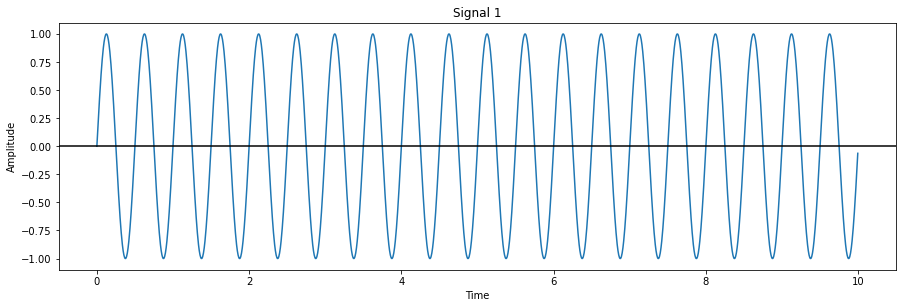

In [15]:
sample_rate = 200
duration = 10
time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal1 = generate_sin_wave(2, time)

fig = plt.figure(figsize=(15,10))
fig.add_subplot(2, 1, 1)
plot_graph('Signal 1', 'Time', 'Amplitude', time, signal1)

### B.2

By using *fft* command imported from *scipy.fft* library, Fourier transform of the sine wave is calculated. The below graphs provide the plots of amplitude and phase of the transformed signal. Amplitude can be produced by calculating the absolute value of the transformed signal using *'np.abs'* command and for plotting the phase using *'np.angle'* command. 
As given in the problem to change the frequency of the signal, another sine wave is generated with frequency value 1. Following this, fourier transform is calculated of this signal. Using the *ifft* command, inverse fourier transform is produced.
Below printed values are the imagionary part of the sine signal after calculating inverse fourier transform in the frequency domain. The values produced are not 0 since python works in discrete domain instead of continuous domain.

Imaginary part of sin signal 2(10 samples):  [ 0.00000000e+00 -5.68434189e-17  5.68434189e-17 -5.68434189e-17
 -5.68434189e-17 -5.68434189e-17 -8.99301432e-32 -5.68434189e-17
  1.13686838e-16  5.68434189e-17]


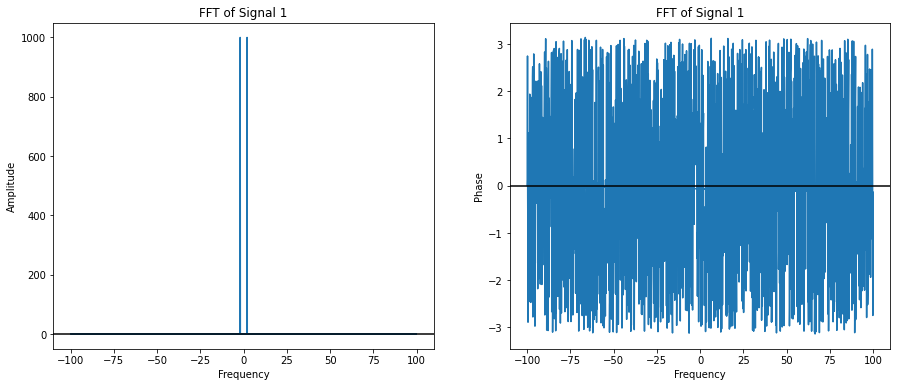

In [16]:
## FFT of sine wave with frequency 1
yfft1 = fft(signal1)
xfft = fftfreq(sample_rate * duration, 1/sample_rate)

fig1 = plt.figure(figsize=(15,6))
fig1.add_subplot(1, 2, 1)
plot_graph('FFT of Signal 1', 'Frequency', 'Amplitude', xfft, np.abs(yfft1))   ## Amplitude

fig1.add_subplot(1, 2, 2)
plot_graph('FFT of Signal 1', 'Frequency', 'Phase', xfft, np.angle(yfft1))   ## Phase

## Sine wave with frequency value 2
time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal2 = generate_sin_wave(1, time)

## FFT of sine wave
yfft2 = fft(signal2)
xfft = fftfreq(sample_rate * duration, 1/sample_rate)

## Inverse fourier transform of sine wave
invfft = ifft(yfft2)
print("Imaginary part of sin signal 2(10 samples): ", invfft.imag[0:10])

### B.3 

#### Part (a) 

In this part, same steps have beem performed as the previous problem on Cosine wave. 
For generating cosine wave, *'np.cos'* command is used (defined under function *generate_cos_wave()* ). 
Similar to the sine wave, the imaginary part of the cosine wave after inverse fourier transform is non-zero due to discrete domain.

[ 0.00000000e+00 -1.80967988e-15  9.05286647e-16 ...  3.14159265e+00
 -3.14159265e+00  3.14159265e+00]
Imaginary part of cos signal 2(10 samples):  [-1.51461294e-31 -3.55271368e-18  7.81597009e-17 -5.68434189e-17
 -1.42108547e-17 -2.84217094e-17 -2.84217094e-17  2.89403811e-32
  5.68434189e-17 -9.15078650e-32]


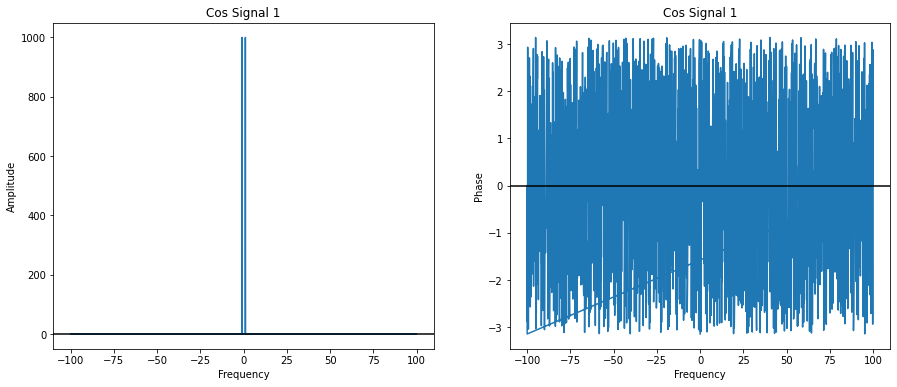

In [17]:
sample_rate = 200
duration = 10
time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

## Cosine wave with frequency value 1
cos_signal1 = generate_cos_wave(1, time)

## FFT of sine wave with frequency 1
cos_fft1 = fft(cos_signal1)
xcosfft = fftfreq(sample_rate * duration, 1/sample_rate)

fig1 = plt.figure(figsize=(15,6))
fig1.add_subplot(1, 2, 1)
plot_graph('Cos Signal 1', 'Frequency', 'Amplitude', xcosfft, np.abs(cos_fft1))   ## Amplitude

fig1.add_subplot(1, 2, 2)
plot_graph('Cos Signal 1', 'Frequency', 'Phase', xcosfft, np.angle(cos_fft1))   ## Phase

## Cosine wave with frequency value 2
cos_signal2 = generate_cos_wave(2, time)

## FFT of cosine wave
cos_fft2 = fft(cos_signal2)

## Inverse fourier transform of cosine wave
invfft_cos2 = ifft(cos_fft2)
print(np.angle(invfft))
print("Imaginary part of cos signal 2(10 samples): ", invfft_cos2.imag[0:10])

#### Part (b) 

In this part, we have generated a unit step signal with magnitude 1. The unit step signal (defined under function *generate_step_signal()* ) exists only for positive time i.e, input is greater than 0. For generating signals with different frequency, we have created an input array with different start and end using *'np.linspace'* command. Rest of the steps followed are same as the previous problem such as calculating FFT and IFFT. 
As observed from the output of the inverse fourier transform of the unit step signal in frequency domain, the imaginary values produced are 0.

Imaginary part of unit step signal 2:  [ 0.  0. -0.]


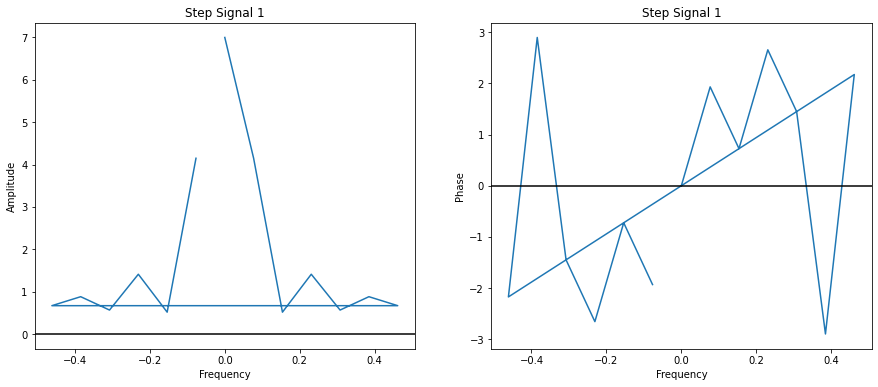

In [18]:
## Unit step signal 1
start1 = -6
end1 = 7
step_signal1 = generate_step_signal(start1, end1)

## Fourier tranmsform of unit step signal 1
stepfft1 = fft(step_signal1)
xstepfft1 = fftfreq(end1-start1, 1)

fig1 = plt.figure(figsize=(15,6))
fig1.add_subplot(1, 2, 1)
plot_graph('Step Signal 1', 'Frequency', 'Amplitude', xstepfft1, np.abs(stepfft1))   ## Amplitude

fig1.add_subplot(1, 2, 2)
plot_graph('Step Signal 1', 'Frequency', 'Phase', xstepfft1, np.angle(stepfft1))   ## Phase

## Unit step signal 2
start2 = -1
end2 = 5
step_signal2 = generate_step_signal(start2, end2, 2)

## Fourier tranmsform of unit step signal 2
stepfft2 = fft(step_signal2)

## Inverse fourier transform of unit step signal 2
invfft_step2 = ifft(stepfft2)
print("Imaginary part of unit step signal 2: ", invfft_step2.imag)

#### Part (c) 

Here, we have generated a unit impulse signal using *'signal.unit_impulse'* command. The unit impusle signal (defined under function *generate_impulse_signal()* ) is generated such that for a given number of input samples, the output is 0 except at the origin where the value is thge highest i.e., 1. For generating signals with different frequency, the input number of samples is changed. Rest of the steps followed are same as the previous problem such as calculating FFT and IFFT. Even with unit impulse signal, the imaginary part of the signal after inverse fourier transform is 0.

Imaginary part of cos signal 2(10 samples):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


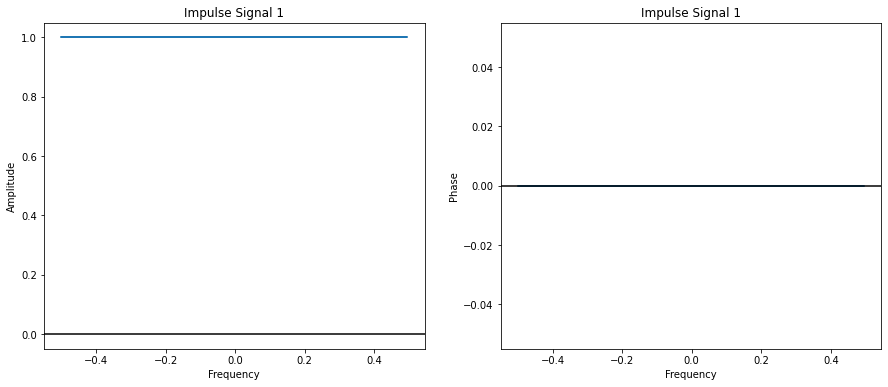

In [19]:
## Unit impulse signal 1
NoS1 = 200
imp_signal1 = generate_impulse_signal(NoS1)

## Fourier transform of unit impulse signal 1
impfft1 = fft(imp_signal1)
ximpfft1 = fftfreq(NoS1, 1)

fig1 = plt.figure(figsize=(15,6))
fig1.add_subplot(1, 2, 1)
plot_graph('Impulse Signal 1', 'Frequency', 'Amplitude', ximpfft1, np.abs(impfft1))   ## Amplitude

fig1.add_subplot(1, 2, 2)
plot_graph('Impulse Signal 1', 'Frequency', 'Phase', ximpfft1, np.angle(impfft1))   ## Phase

## Unit impulse signal 2
NoS2 = 100
imp_signal2 = generate_impulse_signal(NoS2)

## Fourier transform of unit impulse signal 2
ximpfft2 = fft(imp_signal2)

## Inverse fourier transform of unit impulse signal 2
invfft_imp2 = ifft(ximpfft2)
print("Imaginary part of cos signal 2(10 samples): ", invfft_imp2.imag[0:10])

### B.4

Steps followed:
1. Frequency value is set to 1.
2. Using the *'np.linspace'* and *'np.meshgrid'* commands, we have created 2D sine wave.
3. Using *'fft2'* command from *'scipy'* library, fourier transform of the signal is calculated.
4. Amplitude and phase of the signal in frequency domain is plotted using *'imshow'* command.
5. Above steps are repeated for frequency value of 2.

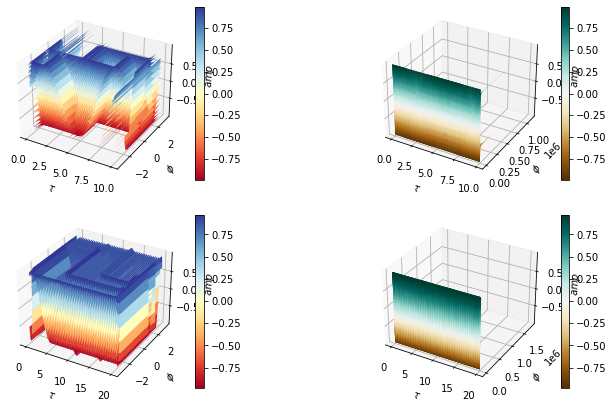

In [20]:
freq = 1
fig = plt.figure(figsize=(12,7))
ax3d = fig.add_subplot(2, 2, 1, projection='3d')

xs = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ys = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

tau, phi = np.meshgrid(xs*freq, ys*freq)

amp = np.sin(tau + phi)
sine2Dfft = fft2(amp)

ax3d.set_xlabel(r'$\tau$')   ## tau --> time
ax3d.set_ylabel(r'$\phi$')   ## phi --> phase
ax3d.set_zlabel(r'$amp$')    ## amplitude

surf = ax3d.plot_surface(tau, np.angle(sine2Dfft), amp, cmap = cm.RdYlBu)
fig.colorbar(surf)

ax3d = fig.add_subplot(2, 2, 2, projection='3d')

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(sine2Dfft), amp ,cmap=cm.BrBG)
fig.colorbar(surf)

## Frequency change
freq1 = 2
ax3d = fig.add_subplot(2, 2, 3, projection='3d')

xs = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ys = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

tau, phi = np.meshgrid(xs*freq1, ys*freq1)

amp = np.sin(tau + phi)
sine2Dfft = fft2(amp)

ax3d.set_xlabel(r'$\tau$')   ## tau --> time
ax3d.set_ylabel(r'$\phi$')   ## phi --> phase
ax3d.set_zlabel(r'$amp$')    ## amplitude

surf = ax3d.plot_surface(tau, np.angle(sine2Dfft), amp, cmap = cm.RdYlBu)
fig.colorbar(surf)

ax3d = fig.add_subplot(2, 2, 4, projection='3d')

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(sine2Dfft), amp ,cmap=cm.BrBG)
fig.colorbar(surf)

### B.5 

#### Box Function

Steps followed:
1. Frequency value is set to 1.
2. Using the *'np.linspace'* and *'np.meshgrid'* commands, we have created 2D sine wave.
3. Using *'fft2'* command from *'scipy'* library, fourier transform of the signal is calculated.
4. Using *'uniform_filter'* command from *'scipy.ndimage'* library, box function is applied.
5. Amplitude and phase of the signal in frequency domain is plotted using *'imshow'* command.
6. Above steps are repeated for frequency value of 2.

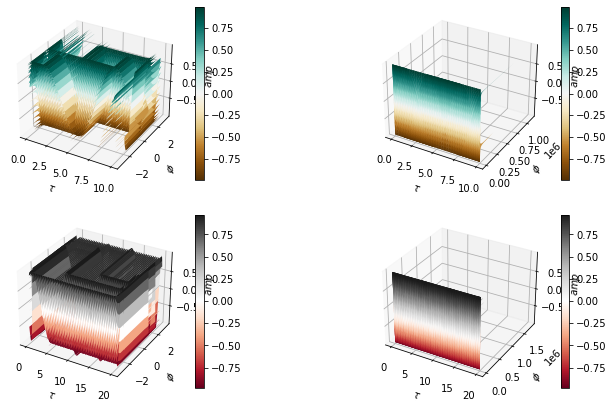

In [21]:
freq1 = 1
fig = plt.figure(figsize=(12,7))
ax3d = fig.add_subplot(2, 2, 1, projection='3d')

xs = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ys = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

tau, phi = np.meshgrid(xs*freq1, ys*freq1)

# Z evaluation
amp = np.sin(tau+phi)
amp_box = uniform_filter(amp, size=3, mode="nearest")
ampfft = fft2(amp_box)

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.angle(ampfft), amp_box, cmap=cm.BrBG)
fig.colorbar(surf)

ax3d = fig.add_subplot(2, 2, 2, projection='3d')

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(ampfft), amp_box, cmap=cm.BrBG)
fig.colorbar(surf)


#Change the frequency
freq2 = 2
ax3d = fig.add_subplot(2, 2, 3, projection='3d')

xs = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ys = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

tau, phi = np.meshgrid(xs*freq2, ys*freq2)

# Z evaluation
amp = np.sin(tau+phi)
amp_box = uniform_filter(amp, size=3, mode="nearest")
ampfft = fft2(amp_box)

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.angle(ampfft), amp_box, cmap=cm.RdGy)
fig.colorbar(surf)

ax3d = fig.add_subplot(2, 2, 4, projection='3d')

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(ampfft), amp_box, cmap=cm.RdGy)
fig.colorbar(surf)


#### Gaussian function

Steps followed:
1. Frequency value is set to 1.
2. Using the *'np.linspace'* and *'np.meshgrid'* commands, we have created 2D sine wave.
3. Using *'fft2'* command from *'scipy'* library, fourier transform of the signal is calculated.
4. Using *'gaussian_filter'* command from *'scipy.ndimage'* library, box function is applied.
5. Amplitude and phase of the signal in frequency domain is plotted using *'imshow'* command.
6. Above steps are repeated for frequency value of 2.

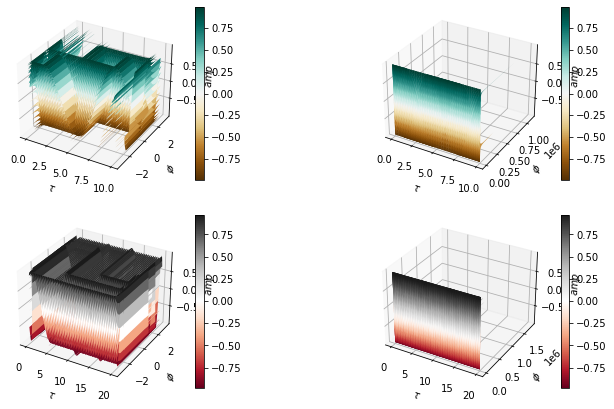

In [22]:
freq1 = 1
fig = plt.figure(figsize=(12,7))
ax3d = fig.add_subplot(2, 2, 1, projection='3d')

xs = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ys = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

tau, phi = np.meshgrid(xs*freq1, ys*freq1)

# Z evaluation
amp = np.sin(tau+phi)
amp_box = gaussian_filter(amp, sigma=1)
ampfft = fft2(amp_box)

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.angle(ampfft), amp_box, cmap=cm.BrBG)
fig.colorbar(surf)

ax3d = fig.add_subplot(2, 2, 2, projection='3d')

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(ampfft), amp_box, cmap=cm.BrBG)
fig.colorbar(surf)


#Change the frequency
freq2 = 2
ax3d = fig.add_subplot(2, 2, 3, projection='3d')

xs = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ys = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

tau, phi = np.meshgrid(xs*freq2, ys*freq2)

# Z evaluation
amp = np.sin(tau+phi)
amp_box = gaussian_filter(amp, sigma=1)
ampfft = fft2(amp_box)

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.angle(ampfft), amp_box, cmap=cm.RdGy)
fig.colorbar(surf)

ax3d = fig.add_subplot(2, 2, 4, projection='3d')

ax3d.set_xlabel(r'$\tau$')  # tau --> time
ax3d.set_ylabel(r'$\phi$')  # phi --> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(ampfft), amp_box, cmap=cm.RdGy)
fig.colorbar(surf)


### B.6

Steps followed:
1. Using *'cv2.imread'* command of opencv, image is read. 
2. Using *'fft2'* command from *'scipy'* library, fourier transform is calculated of the image. 
3. Amplitude and phase of the signal in frequency domain is plotted using *'imshow'* command.
4. Using *'fftshift'* command from *'scipy'* library, zero frequencies are shifted to the centre. 

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/848169407.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(imgfft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/848169407.py:10: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(imgfft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/848169407.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/848169407.py:18: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")


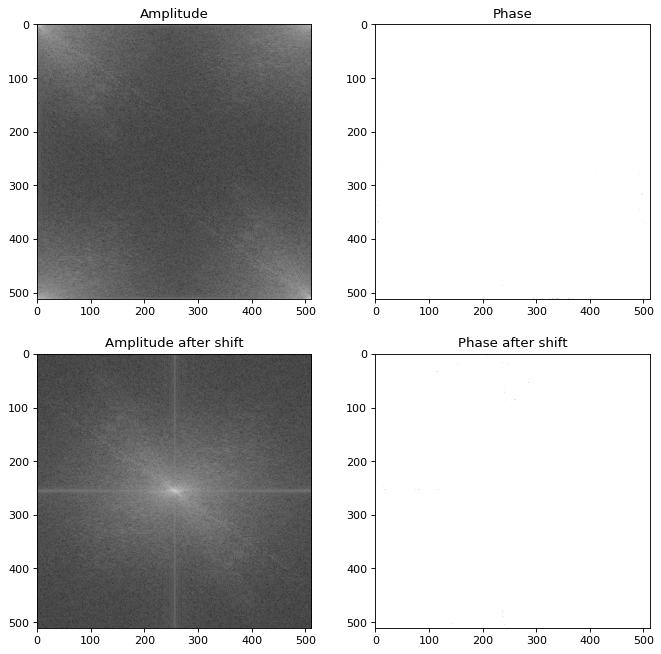

In [23]:
path = "lenaG.bmp"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
imgfft = fft2(img)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.add_subplot(2, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(imgfft)), cmap="gray")
fig.add_subplot(2, 2, 2)
plt.title("Phase")
plt.imshow(np.log(np.angle(imgfft)), cmap="gray")

imgfftshift = fftshift(imgfft)
fig.add_subplot(2, 2, 3)
plt.title("Amplitude after shift")
plt.imshow(np.log(abs(imgfftshift)), cmap="gray")
fig.add_subplot(2, 2, 4)
plt.title("Phase after shift")
plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")

### B.7 

Steps followed:
1. Using *'ifft2'* command, inverse fourier transform of the previous image is calculated in the frequency domain to get back the original signal.
2. Using the *'imag()'* command, imaginary values are produced of the image after inverse fourier transform. Values are non-zero since python works in discrete domain instead of continuous domain.

Imaginary values:  [[ 0.00000000e+00  7.77156117e-16 -2.87964097e-15 ...  1.26301286e-15
  -1.91186653e-15  1.67784657e-15]
 [ 1.12323345e-16  4.15877850e-15  3.41306844e-16 ...  9.06702162e-15
  -7.06629782e-15  2.42589338e-15]
 [-3.38943283e-15  5.02982653e-15 -3.04248814e-15 ...  1.88187965e-15
  -4.47897334e-15  3.37898256e-15]
 ...
 [-1.89128227e-15  3.30278621e-15 -4.41703965e-15 ...  9.14566128e-15
  -3.84831869e-15  6.88975929e-15]
 [ 7.56512908e-15 -8.29242028e-15  3.63771513e-15 ...  1.78040252e-15
  -1.96237476e-15  1.94482327e-15]
 [-1.63635652e-15  3.83822651e-15 -6.64911373e-16 ... -2.52064795e-15
   3.18004087e-15  2.55684811e-15]]


/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/2184686700.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(imgifft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/2184686700.py:8: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(imgifft)), cmap="gray")


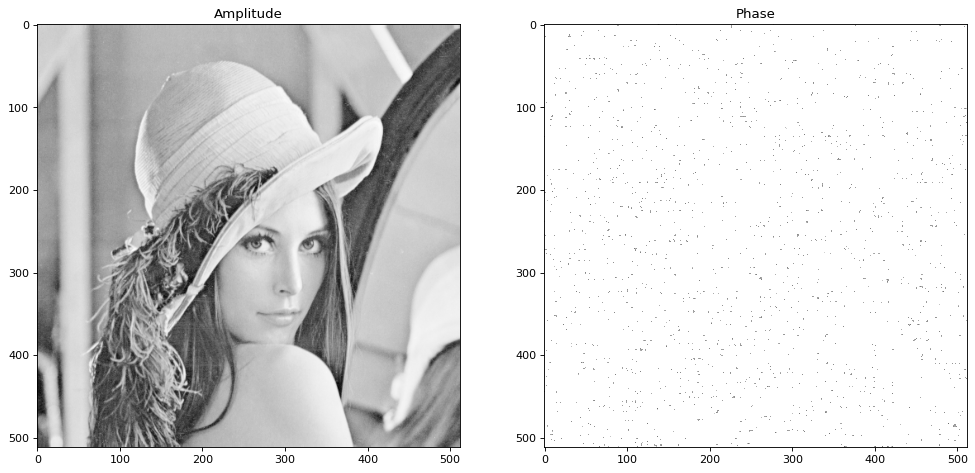

In [24]:
imgifft = ifft2(imgfftshift)
fig = plt.figure(figsize=(15,10), dpi=80)
fig.add_subplot(1, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(imgifft)), cmap="gray")
fig.add_subplot(1, 2, 2)
plt.title("Phase")
plt.imshow(np.log(np.angle(imgifft)), cmap="gray")
print("Imaginary values: ", imgifft.imag[0:10])


### B.8 

Using the fourier transformed image in B.6, the inverse fourier transform is calculated on the absolute value of this image i.e. using *'abs()'* command. This takes the amplitude of the image and sets phase to 0.

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/4223669614.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(ifftampimg)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/4223669614.py:8: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(ifftampimg)), cmap="gray")


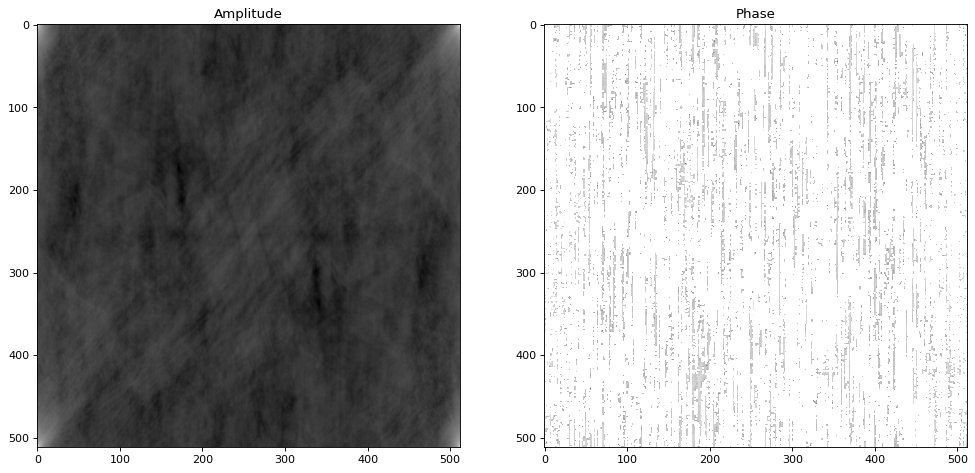

In [25]:
ifftampimg = ifft2(abs(imgfft))
fig = plt.figure(figsize=(15,10), dpi=80)
fig.add_subplot(1, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(ifftampimg)), cmap="gray")
fig.add_subplot(1, 2, 2)
plt.title("Phase")
plt.imshow(np.log(np.angle(ifftampimg)), cmap="gray")

### B.9 

Steps followed:
1. Using *'np.full'* command, the amplitude of the fourier transformed image is set to unity. 
2. Adding the above to the imaginary part using *'np.add'* command and using the *'ifft2'* command, inverse fourier transform is calculated.
3. Following the above steps,  the phase and amplitude are plotted of the inverse fourier transformed image.

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1465165581.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(invfft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1465165581.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(invfft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1465165581.py:10: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(invfft)), cmap="gray")


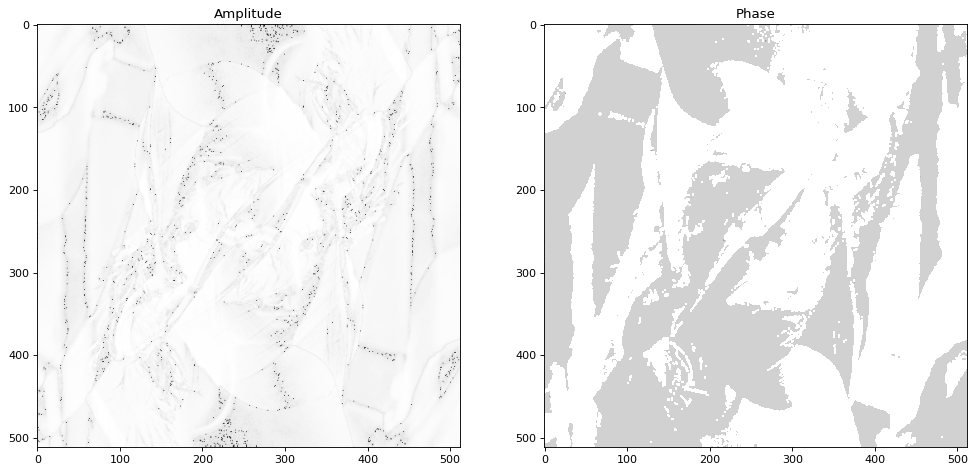

In [26]:
imgunity = np.add(np.full(imgfft.shape, 1), imgfft.imag) 
invfft = ifft2(imgunity)

fig = plt.figure(figsize=(15,10), dpi=80)
fig.add_subplot(1, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(invfft)), cmap="gray")
fig.add_subplot(1, 2, 2)
plt.title("Phase")
plt.imshow(np.log(np.angle(invfft)), cmap="gray")


### B.10 

Steps followed: 
1. Using the *'rotate'* command from *'imutils'* library, image is rotated by 90°.
2. Fourier transform is calculated.
3. Amplitude and phase of the images after the rotation are plotted.
We can observe that the phase is also rotated by 90° as com0pared to the result in B.6.

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1085665758.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(rtfft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1085665758.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(rtfft)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1085665758.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(rtfftshift)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_47510/1085665758.py:17: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(rtfftshift)), cmap="gray")


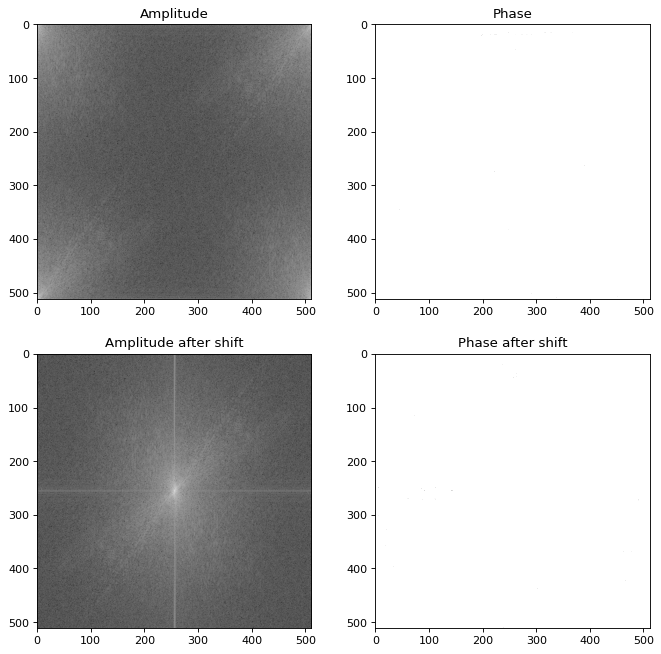

In [27]:
rotated_image = imutils.rotate(img, angle=90)
rtfft = fft2(rotated_image)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.add_subplot(2, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(rtfft)), cmap="gray")
fig.add_subplot(2, 2, 2)
plt.title("Phase")
plt.imshow(np.log(np.angle(rtfft)), cmap="gray")

rtfftshift = fftshift(rtfft)
fig.add_subplot(2, 2, 3)
plt.title("Amplitude after shift")
plt.imshow(np.log(abs(rtfftshift)), cmap="gray")
fig.add_subplot(2, 2, 4)
plt.title("Phase after shift")
plt.imshow(np.log(np.angle(rtfftshift)), cmap="gray")